In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
c_what_and_why_filename = "./cm_what_and_why_codestral-latest.csv"

In [3]:
c_what_and_c_why_df = pd.read_csv(c_what_and_why_filename)
c_what_and_c_why_df.head()

,id,repo_id,label,url,if_mulit_commit,message,new_message1,authorName,authorEmail,commitDate,committerName,committerEmail,committerDate,contains,contains_expl
0,1,1,0,https://github.com/junit-team/junit4/commit/12...,NaN,Mark ThreadGroups created by FailOnTimeout as ...,Mark ThreadGroups created by <file_name> as ...,Kevin Cooney,kcooney@users.noreply.github.com,2021-01-02T22:09:07Z,GitHub,noreply@github.com,2021-01-02T22:09:07Z,Why and What,The message clearly presents both the 'Why' (t...
1,27,1,0,https://github.com/junit-team/junit4/commit/43...,NaN,Use Google's Maven Central mirror <enter> <en...,Use Google's <iden> mirror <enter> We are usi...,Stefan Birkner,mail@stefan-birkner.de,2020-02-07T20:35:25Z,Marc Philipp,marc@gradle.com,2020-02-19T10:13:01Z,Why and What,The message clearly explains both the 'What' (...
2,38,1,3,https://github.com/junit-team/junit4/commit/6c...,NaN,Remove reference to obsolete mailing list,Remove reference to obsolete mailing list,Marc Philipp,mail@marcphilipp.de,2019-11-02T13:05:11Z,Marc Philipp,mail@marcphilipp.de,2019-11-02T13:05:11Z,No Why,The commit message only summarizes the changes...
3,56,1,0,https://github.com/junit-team/junit4/commit/46...,NaN,Deprecate Assert#assertThat <enter> <enter> T...,Deprecate <method_name> <enter> The method <i...,Stefan Birkner,mail@stefan-birkner.de,2019-09-26T20:24:47Z,Stefan Birkner,mail@stefan-birkner.de,2019-10-13T18:24:00Z,Why and What,The message clearly states the reason for the ...
4,66,1,0,https://github.com/junit-team/junit4/commit/8a...,NaN,Revert 'ExternalResource: declare after() to t...,Revert ' <file_name> : declare after() to thro...,Alex Panchenko,alex.panchenko@gmail.com,2019-04-03T15:20:00Z,Marc Philipp,marc@gradle.com,2019-04-04T09:22:28Z,Why and What,The message presents both the what (Revert 'Ex...


In [4]:
c_what_and_c_why_df['contains'].value_counts()

contains
Why and What    1056
No Why           506
No What           35
What and Why      10
What               6
Name: count, dtype: int64

In [5]:
c_what_and_c_why_df['contains'] = c_what_and_c_why_df['contains'].replace('What and Why', 'Why and What')
c_what_and_c_why_df['contains'] = c_what_and_c_why_df['contains'].replace('What', 'No Why')
c_what_and_c_why_df['contains'].value_counts()

contains
Why and What    1066
No Why           512
No What           35
Name: count, dtype: int64

In [6]:
c_what_and_c_why_df['label'] = c_what_and_c_why_df['label'].replace(0, 'Why and What')
c_what_and_c_why_df['label'] = c_what_and_c_why_df['label'].replace(1,'Neither Why nor What')
c_what_and_c_why_df['label'] = c_what_and_c_why_df['label'].replace(2,'No What')
c_what_and_c_why_df['label'] = c_what_and_c_why_df['label'].replace(3,'No Why')
c_what_and_c_why_df['label'].value_counts()

label
Why and What            969
No Why                  428
No What                 187
Neither Why nor What     65
Name: count, dtype: int64

In [7]:
labels = ['Why and What', 'No Why', 'No What', 'Neither Why nor What']

In [8]:
cm = confusion_matrix(c_what_and_c_why_df['label'].to_list(),c_what_and_c_why_df['contains'].to_list(), labels=labels)

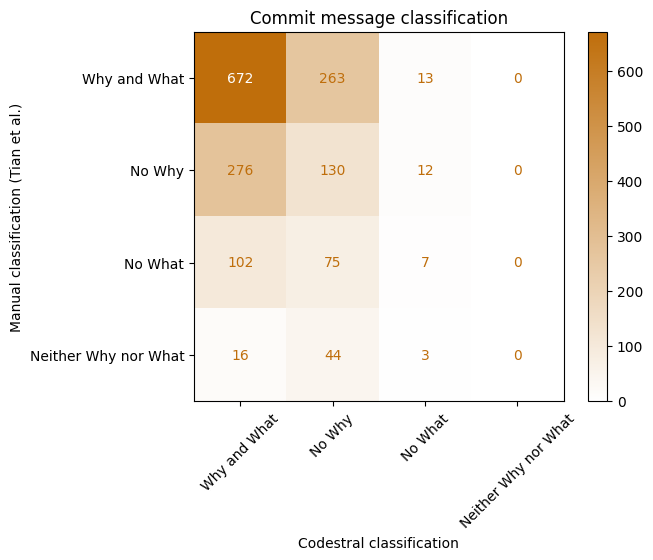

In [9]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white","#BF6E0B"])
cm_display.plot(cmap=cmap)
plt.xticks(rotation=45)
plt.ylabel('Manual classification (Tian et al.)')
plt.xlabel('Codestral classification')
plt.title('Commit message classification')
plt.show()

In [10]:
cohen_kappa_score(c_what_and_c_why_df['label'].to_list(),c_what_and_c_why_df['contains'].to_list())

0.05162793054199544

In [11]:
class_rep_dict = classification_report(c_what_and_c_why_df['label'].to_list(),c_what_and_c_why_df['contains'].to_list(), labels= labels, output_dict=True)

c:\Users\Kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [12]:
class_rep_dict['Average (weighted)'] = class_rep_dict.pop('weighted avg')
class_rep_dict.pop('micro avg')
class_rep_dict.pop('macro avg')

{'precision': 0.2710750615619137,
 'recall': 0.2586674812124018,
 'f1-score': 0.25002526704654365,
 'support': 1649.0}

In [13]:
class_rep_df = pd.DataFrame(class_rep_dict).transpose()
class_rep_df

,precision,recall,f1-score,support
Why and What,0.630394,0.693498,0.660442,969.0
No Why,0.253906,0.303738,0.276596,428.0
No What,0.200000,0.037433,0.063063,187.0
Neither Why nor What,0.000000,0.000000,0.000000,65.0
Average (weighted),0.459020,0.490600,0.467037,1649.0


In [14]:
class_rep_df.to_latex('c_why_and_what_table.tex', float_format="%.2f")